In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Data scaling
# normalization
from sklearn.preprocessing import MinMaxScaler

# standardization
from sklearn.preprocessing import StandardScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
#load data(sometimes need to use "/")
df = pd.read_csv('C:/Users/user/Desktop/Final_assignment/Data/organics - 迴歸.csv',encoding='big5')
df

,Customer.Loyalty.ID,Gender,Geographic.Region,Loyalty.Status,Neigborhood.Cluster.55.Level,Neighborhood.Cluster.7.Level,Television.Region,Affluence.Grade,Age,Loyalty.Card.Tenure,Organics.Purchase.Indicator,Total.Spend
0,140,NaN,Midlands,Gold,16.0,C,Wales & West,10.0,76.0,4.0,0,16000.00
1,620,NaN,Midlands,Gold,35.0,D,Wales & West,4.0,49.0,5.0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5.0,70.0,8.0,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10.0,65.0,7.0,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11.0,68.0,8.0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,F,South East,Silver,9.0,B,London,13.0,65.0,5.0,0,1500.00
22219,52834376,NaN,South East,Gold,34.0,D,S & S East,15.0,73.0,12.0,0,6053.06
22220,52837057,F,North,Gold,15.0,B,Yorkshire,9.0,70.0,5.0,0,6000.00
22221,52838096,F,North,Silver,8.0,B,N West,11.0,66.0,5.0,0,5000.00


# 1. Quick overview to get a grasp of the data set

In [4]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer.Loyalty.ID           22223 non-null  int64  
 1   Gender                        17964 non-null  object 
 2   Geographic.Region             21758 non-null  object 
 3   Loyalty.Status                22223 non-null  object 
 4   Neigborhood.Cluster.55.Level  21549 non-null  float64
 5   Neighborhood.Cluster.7.Level  21528 non-null  object 
 6   Television.Region             21758 non-null  object 
 7   Affluence.Grade               21138 non-null  float64
 8   Age                           20715 non-null  float64
 9   Loyalty.Card.Tenure           21942 non-null  float64
 10  Organics.Purchase.Indicator   22223 non-null  int64  
 11  Total.Spend                   22223 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 2.0+ MB


In [5]:
# 1.2 Show the correct descriptive statistics
df.describe()

,Customer.Loyalty.ID,Neigborhood.Cluster.55.Level,Affluence.Grade,Age,Loyalty.Card.Tenure,Organics.Purchase.Indicator,Total.Spend
count,2.222300e+04,21549.000000,21138.000000,20715.000000,21942.000000,22223.000000,22223.000000
mean,2.605540e+07,27.193652,8.711893,53.797152,6.564670,0.247716,4420.590041
std,1.507497e+07,15.751547,3.421125,13.206048,4.657113,0.431696,7559.047522
min,1.400000e+02,1.000000,0.000000,18.000000,0.000000,0.000000,0.010000
25%,1.169402e+07,14.000000,6.000000,44.000000,4.000000,0.000000,0.010000
50%,2.874879e+07,27.000000,8.000000,54.000000,5.000000,0.000000,2000.000000
75%,3.745402e+07,38.000000,11.000000,64.000000,8.000000,0.000000,6000.000000
max,5.285647e+07,55.000000,34.000000,79.000000,39.000000,1.000000,296313.850000


In [7]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Customer.Loyalty.ID,Gender,Geographic.Region,Loyalty.Status,Neigborhood.Cluster.55.Level,Neighborhood.Cluster.7.Level,Television.Region,Affluence.Grade,Age,Loyalty.Card.Tenure,Organics.Purchase.Indicator,Total.Spend
count,2.222300e+04,17964,21758,22223,21549.000000,21528,21758,21138.000000,20715.000000,21942.000000,22223.000000,22223.000000
unique,NaN,2,5,4,NaN,7,13,NaN,NaN,NaN,NaN,NaN
top,NaN,F,South East,Silver,NaN,C,London,NaN,NaN,NaN,NaN,NaN
freq,NaN,12149,8634,8572,NaN,4566,6189,NaN,NaN,NaN,NaN,NaN
mean,2.605540e+07,NaN,NaN,NaN,27.193652,NaN,NaN,8.711893,53.797152,6.564670,0.247716,4420.590041
std,1.507497e+07,NaN,NaN,NaN,15.751547,NaN,NaN,3.421125,13.206048,4.657113,0.431696,7559.047522
min,1.400000e+02,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,18.000000,0.000000,0.000000,0.010000
25%,1.169402e+07,NaN,NaN,NaN,14.000000,NaN,NaN,6.000000,44.000000,4.000000,0.000000,0.010000
50%,2.874879e+07,NaN,NaN,NaN,27.000000,NaN,NaN,8.000000,54.000000,5.000000,0.000000,2000.000000
75%,3.745402e+07,NaN,NaN,NaN,38.000000,NaN,NaN,11.000000,64.000000,8.000000,0.000000,6000.000000


In [18]:
# Change data type
df[['Organics.Purchase.Indicator']]=df[['Organics.Purchase.Indicator']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer.Loyalty.ID           22223 non-null  int64  
 1   Gender                        17964 non-null  object 
 2   Geographic.Region             21758 non-null  object 
 3   Loyalty.Status                22223 non-null  object 
 4   Neigborhood.Cluster.55.Level  21549 non-null  float64
 5   Neighborhood.Cluster.7.Level  21528 non-null  object 
 6   Television.Region             21758 non-null  object 
 7   Affluence.Grade               21138 non-null  float64
 8   Age                           20715 non-null  float64
 9   Loyalty.Card.Tenure           21942 non-null  float64
 10  Organics.Purchase.Indicator   22223 non-null  object 
 11  Total.Spend                   22223 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.0+ MB


In [19]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df[['Gender']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Geographic.Region']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Loyalty.Status']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Neighborhood.Cluster.7.Level']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Television.Region']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Organics.Purchase.Indicator']].value_counts(sort=True))

Gender
F         12149
M          5815
dtype: int64
+-----------------------+
Geographic.Region
South East           8634
Midlands             6741
North                4324
Scottish             1368
South West            691
dtype: int64
+-----------------------+
Loyalty.Status
Silver            8572
Tin               6487
Gold              6324
Platinum           840
dtype: int64
+-----------------------+
Neighborhood.Cluster.7.Level
C                               4566
D                               4378
B                               4144
F                               3949
E                               2608
A                               1850
U                                 33
dtype: int64
+-----------------------+
Television.Region
London               6189
Midlands             3123
S & S East           2445
N West               2096
Wales & West         1703
East                 1649
Yorkshire            1443
C Scotland            836
N East                785
S West    

In [20]:
# Tips: row,column
df[['Neigborhood.Cluster.55.Level','Affluence.Grade','Age','Loyalty.Card.Tenure','Total.Spend']].describe()

,Neigborhood.Cluster.55.Level,Affluence.Grade,Age,Loyalty.Card.Tenure,Total.Spend
count,21549.000000,21138.000000,20715.000000,21942.000000,22223.000000
mean,27.193652,8.711893,53.797152,6.564670,4420.590041
std,15.751547,3.421125,13.206048,4.657113,7559.047522
min,1.000000,0.000000,18.000000,0.000000,0.010000
25%,14.000000,6.000000,44.000000,4.000000,0.010000
50%,27.000000,8.000000,54.000000,5.000000,2000.000000
75%,38.000000,11.000000,64.000000,8.000000,6000.000000
max,55.000000,34.000000,79.000000,39.000000,296313.850000


# 2. Data preprocessing

In [21]:
#缺失值個數
# num = df['BMI'].isna().sum()
# num
# 2.1 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df

,Customer.Loyalty.ID,Gender,Geographic.Region,Loyalty.Status,Neigborhood.Cluster.55.Level,Neighborhood.Cluster.7.Level,Television.Region,Affluence.Grade,Age,Loyalty.Card.Tenure,Organics.Purchase.Indicator,Total.Spend
2,868,F,Midlands,Silver,27.0,D,Wales & West,5.0,70.0,8.0,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10.0,65.0,7.0,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11.0,68.0,8.0,0,0.01
6,3131,F,Midlands,Tin,3.0,A,East,11.0,74.0,8.0,0,0.01
7,3328,M,North,Tin,32.0,D,N East,13.0,62.0,5.0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
22213,52823242,M,Midlands,Silver,25.0,C,Midlands,14.0,43.0,2.0,1,3336.92
22216,52830893,M,South East,Silver,8.0,B,London,13.0,49.0,9.0,0,500.00
22218,52834058,F,South East,Silver,9.0,B,London,13.0,65.0,5.0,0,1500.00
22220,52837057,F,North,Gold,15.0,B,Yorkshire,9.0,70.0,5.0,0,6000.00


In [22]:
# 刪除不要的column
new_df=new_df.drop(['Customer.Loyalty.ID'],axis = 1).copy()
new_df

,Gender,Geographic.Region,Loyalty.Status,Neigborhood.Cluster.55.Level,Neighborhood.Cluster.7.Level,Television.Region,Affluence.Grade,Age,Loyalty.Card.Tenure,Organics.Purchase.Indicator,Total.Spend
2,F,Midlands,Silver,27.0,D,Wales & West,5.0,70.0,8.0,1,0.02
3,M,Midlands,Tin,51.0,F,Midlands,10.0,65.0,7.0,1,0.01
4,F,Midlands,Tin,4.0,A,Midlands,11.0,68.0,8.0,0,0.01
6,F,Midlands,Tin,3.0,A,East,11.0,74.0,8.0,0,0.01
7,M,North,Tin,32.0,D,N East,13.0,62.0,5.0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
22213,M,Midlands,Silver,25.0,C,Midlands,14.0,43.0,2.0,1,3336.92
22216,M,South East,Silver,8.0,B,London,13.0,49.0,9.0,0,500.00
22218,F,South East,Silver,9.0,B,London,13.0,65.0,5.0,0,1500.00
22220,F,North,Gold,15.0,B,Yorkshire,9.0,70.0,5.0,0,6000.00


In [24]:
new_df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','Y']
new_df.to_csv('C:/Users/user/Desktop/Final_assignment/Data/organics_deleteNA.csv',index=False,encoding='big5')
print('Export complete...')

Export complete...


In [26]:
new_df = pd.read_csv('C:/Users/user/Desktop/Final_assignment/Data/organics_deleteNA_01.csv',encoding='big5')
new_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,2,3,3,27,4,11,5,70,8,1,0.02
1,1,3,4,51,6,5,10,65,7,1,0.01
2,2,3,4,4,1,5,11,68,8,0,0.01
3,2,3,4,3,1,3,11,74,8,0,0.01
4,1,1,4,32,4,6,13,62,5,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
14915,1,3,3,25,3,5,14,43,2,1,3336.92
14916,1,4,3,8,2,4,13,49,9,0,500.00
14917,2,4,3,9,2,4,13,65,5,0,1500.00
14918,2,1,2,15,2,12,9,70,5,0,6000.00


In [36]:
# Recheck the descriptive statistics
new_df[['X4','X7','X8','X9','Y']].describe()

,X4,X7,X8,X9,Y
count,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000
mean,27.289075,8.829088,53.542627,6.564075,4429.818282
std,15.724376,3.485611,13.314997,4.612171,7574.399173
min,1.000000,0.000000,18.000000,0.000000,0.010000
25%,14.000000,6.000000,43.000000,4.000000,0.010000
50%,27.000000,8.000000,53.000000,5.000000,2000.000000
75%,39.000000,11.000000,64.000000,8.000000,6000.000000
max,55.000000,34.000000,79.000000,38.000000,296313.850000


In [34]:
# Recheck the descriptive statistics
# print(new_df[['X1']].value_counts(sort=True)/ len(new_df.X1)) #計算百分比
print(new_df[['X1']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X2']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X3']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X5']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X6']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X10']].value_counts(sort=True))
print('+-----------------------+')

X1
2     10094
1      4826
dtype: int64
+-----------------------+
X2
4     5950
3     4514
1     3020
2      955
5      481
dtype: int64
+-----------------------+
X3
3     5726
4     4388
2     4231
1      575
dtype: int64
+-----------------------+
X5
3     3171
4     3025
2     2866
6     2781
5     1808
1     1248
7       21
dtype: int64
+-----------------------+
X6
4     4258
5     2202
9     1692
8     1439
11    1183
3     1129
12    1028
2      591
6      553
10     481
7      226
1      138
dtype: int64
+-----------------------+
X10
0      10685
1       4235
dtype: int64
+-----------------------+


In [37]:
new_df.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000
mean,1.676542,2.994437,2.933445,27.289075,3.650536,6.336997,8.829088,53.542627,6.564075,0.283847,4429.818282
std,0.467812,1.183837,0.852910,15.724376,1.578347,3.020314,3.485611,13.314997,4.612171,0.450879,7574.399173
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.010000
25%,1.000000,2.000000,2.000000,14.000000,2.000000,4.000000,6.000000,43.000000,4.000000,0.000000,0.010000
50%,2.000000,3.000000,3.000000,27.000000,4.000000,5.000000,8.000000,53.000000,5.000000,0.000000,2000.000000
75%,2.000000,4.000000,4.000000,39.000000,5.000000,9.000000,11.000000,64.000000,8.000000,1.000000,6000.000000
max,2.000000,5.000000,4.000000,55.000000,7.000000,12.000000,34.000000,79.000000,38.000000,1.000000,296313.850000


In [38]:
# 2.2 Using unique function to check category label
print('X1',new_df['X1'].unique())
print('X2',new_df['X2'].unique())
print('X3',new_df['X3'].unique())
print('X5',new_df['X5'].unique())
print('X6',new_df['X6'].unique())
print('X10',new_df['X10'].unique())

X1 [2 1]
X2 [3 1 4 5 2]
X3 [3 4 2 1]
X5 [4 6 1 3 2 5 7]
X6 [11  5  3  6  9  4  8 10 12  1  2  7]
X10 [1 0]


In [40]:
#2.4 Using pd.get_dummies function to generate dummies
dummied_new_df=pd.get_dummies(new_df,columns=['X1','X2','X3','X5','X6','X10']).copy()
dummied_new_df.head()

,X4,X7,X8,X9,Y,X1_1,X1_2,X2_1,X2_2,X2_3,...,X6_5,X6_6,X6_7,X6_8,X6_9,X6_10,X6_11,X6_12,X10_0,X10_1
0,27,5,70,8,0.02,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,51,10,65,7,0.01,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,11,68,8,0.01,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,3,11,74,8,0.01,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,32,13,62,5,0.01,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [41]:
# Export to CSV file Note: preset folder path is required
dummied_new_df.to_csv('C:/Users/user/Desktop/Final_assignment/Data/organics_deleteNA_dummies.csv',index=False, header=True,encoding='big5')
print('Export complete...')

Export complete...


# 資料可視化、交叉表、檢定

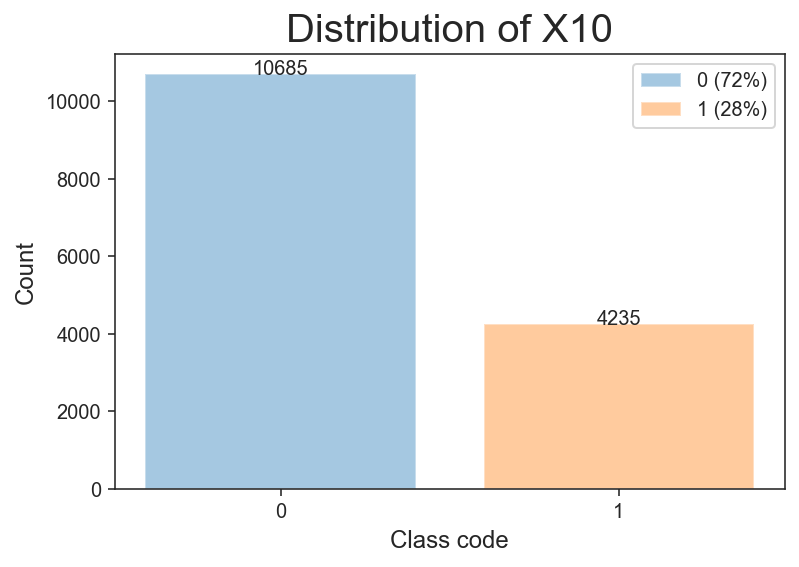

In [63]:
#類別變數資料可視化
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
x=['0','1']
y=[10685,4235]


plt.bar(x[0],y[0],align='center',alpha=0.4,label='0 (72%)')
plt.bar(x[1],y[1],align='center',alpha=0.4,label='1 (28%)')



plt.title("Distribution of X10",fontsize="20")
plt.xlabel("Class code",fontsize="12")
plt.ylabel("Count",fontsize="12")
plt.legend(loc='best')
for x,y in enumerate(y):plt.text(x,y,'%s'%y,ha='center')
plt.show()

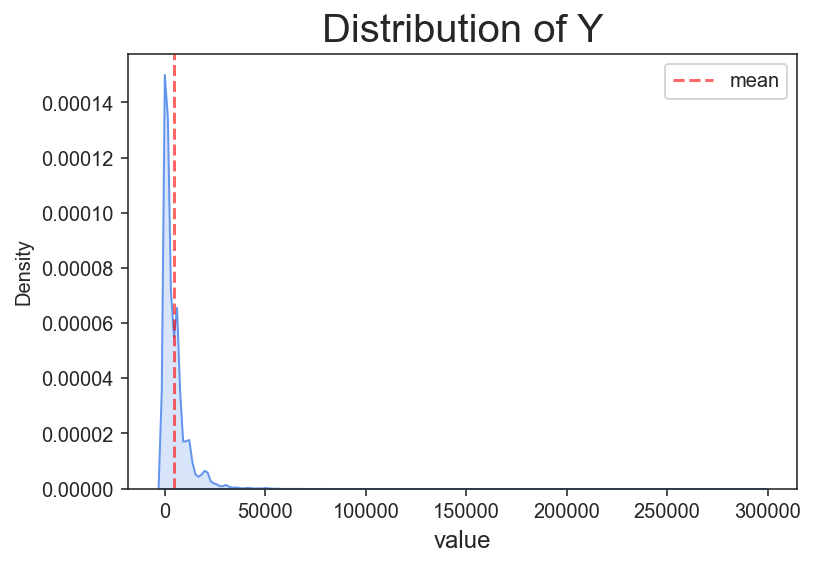

In [65]:
#連續變數資料可視化
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set_style('ticks')
import matplotlib.pyplot as plt

sns.kdeplot(new_df['Y'],shade=True,color='cornflowerblue')#出的概率密度曲线
plt.axvline(new_df['Y'].mean(), label='mean',linestyle='--', color='red',alpha=0.6)

plt.title("Distribution of Y",fontsize="20")
plt.xlabel("value",fontsize="12")
plt.legend()
plt.show()